<a href="https://colab.research.google.com/github/RostislavB74/NN_HW9/blob/main/GoIT_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras as K
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras
import itertools
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Завантажуємо Датасет
from keras.datasets import fashion_mnist

Параметри

In [3]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 28*28 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальне число епох
batch_size = 512 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат і точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

In [35]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Мысли вслух.
як краще підходити до задачі.

Виникла ідея розбити тренувальний датасет на два класи
1. одежа
2. взуття
3. аксесуари
4. потім все ж таки об'єднати взуття та аксесуари разом.

провести тренування


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Розділити дані на три класи: взуття, одяг і аксесуари
shoe_indices = np.where((y_train == 7) | (y_train == 9))[0]
clothing_indices = np.where((y_train >= 0) & (y_train <= 6))[0]
accessory_indices = np.where(y_train == 8)[0]

# Створити підмасиви даних для кожного класу
shoe_data = x_train[shoe_indices]
clothing_data = x_train[clothing_indices]
accessory_data = x_train[accessory_indices]

# Перевірити розмір кожного підмасиву
print("Розмір підмасиву взуття:", shoe_data.shape)
print("Розмір підмасиву одягу:", clothing_data.shape)
print("Розмір підмасиву аксесуарів:", accessory_data.shape)



Розмір підмасиву взуття: (12000, 28, 28)
Розмір підмасиву одягу: (42000, 28, 28)
Розмір підмасиву аксесуарів: (6000, 28, 28)


In [6]:
# Виведення міток для кожного класу
shoe_labels = y_train[shoe_indices]
clothing_labels = y_train[clothing_indices]
accessory_labels = y_train[accessory_indices]

print("Мітки взуття:", shoe_labels)
print("Мітки одягу:", clothing_labels)
print("Мітки аксесуарів:", accessory_labels)


Мітки взуття: [9 7 9 ... 9 7 7]
Мітки одягу: [0 0 3 ... 3 0 5]
Мітки аксесуарів: [8 8 8 ... 8 8 8]


In [7]:
# Визначення кількості міток для кожного класу
num_shoe_labels = shoe_labels.shape[0]
num_clothing_labels = clothing_labels.shape[0]
num_accessory_labels = accessory_labels.shape[0]

print("Кількість міток взуття:", num_shoe_labels)
print("Кількість міток одягу:", num_clothing_labels)
print("Кількість міток аксесуарів:", num_accessory_labels)


Кількість міток взуття: 12000
Кількість міток одягу: 42000
Кількість міток аксесуарів: 6000


In [9]:
import numpy as np

# Підрахунок кількості міток для кожного класу в датасеті взуття
shoe_label_counts = np.bincount(shoe_labels)
print("Кількість міток для кожного класу взуття:")
for i, count in enumerate(shoe_label_counts):
    print(f"Клас {i}: {count} міток")

# Аналогічно для інших датасетів (одягу і аксесуарів)


Кількість міток для кожного класу взуття:
Клас 0: 0 міток
Клас 1: 0 міток
Клас 2: 0 міток
Клас 3: 0 міток
Клас 4: 0 міток
Клас 5: 0 міток
Клас 6: 0 міток
Клас 7: 6000 міток
Клас 8: 0 міток
Клас 9: 6000 міток


In [10]:
clothing_label_counts = np.bincount(clothing_labels)
print("Кількість міток для кожного класу одежа:")
for i, count in enumerate(clothing_label_counts):
    print(f"Клас {i}: {count} міток")

Кількість міток для кожного класу одежа:
Клас 0: 6000 міток
Клас 1: 6000 міток
Клас 2: 6000 міток
Клас 3: 6000 міток
Клас 4: 6000 міток
Клас 5: 6000 міток
Клас 6: 6000 міток


In [11]:
accessory_label_counts = np.bincount(accessory_labels)
print("Кількість міток для кожного класу аксесуари:")
for i, count in enumerate(accessory_label_counts):
    print(f"Клас {i}: {count} міток")

Кількість міток для кожного класу аксесуари:
Клас 0: 0 міток
Клас 1: 0 міток
Клас 2: 0 міток
Клас 3: 0 міток
Клас 4: 0 міток
Клас 5: 0 міток
Клас 6: 0 міток
Клас 7: 0 міток
Клас 8: 6000 міток


In [12]:
# Об'єднати дані для взуття та аксесуарів
combined_data = np.concatenate((shoe_data, accessory_data), axis=0)

# Створити мітки для об'єднаних даних
combined_labels = np.concatenate((shoe_labels, accessory_labels), axis=0)

# Перевірити розмір об'єднаних даних та міток
print("Розмір об'єднаних даних:", combined_data.shape)
print("Розмір об'єднаних міток:", combined_labels.shape)


Розмір об'єднаних даних: (18000, 28, 28)
Розмір об'єднаних міток: (18000,)


In [13]:
type(combined_data)

numpy.ndarray

In [14]:
from sklearn.model_selection import train_test_split

# Розбиття даних на тренувальні та тестові набори
x_train_comb, x_test_comb, y_train_comb, y_test_comb = train_test_split(combined_data, combined_labels, test_size=0.2, random_state=42)

# Виведення розмірності тренувальних та тестових наборів даних
print("Розмір x_train_comb:", x_train_comb.shape)
print("Розмір x_test_comb:", x_test_comb.shape)
print("Розмір y_train_comb:", y_train_comb.shape)
print("Розмір y_test_comb:", y_test_comb.shape)


Розмір x_train_comb: (14400, 28, 28)
Розмір x_test_comb: (3600, 28, 28)
Розмір y_train_comb: (14400,)
Розмір y_test_comb: (3600,)


In [15]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

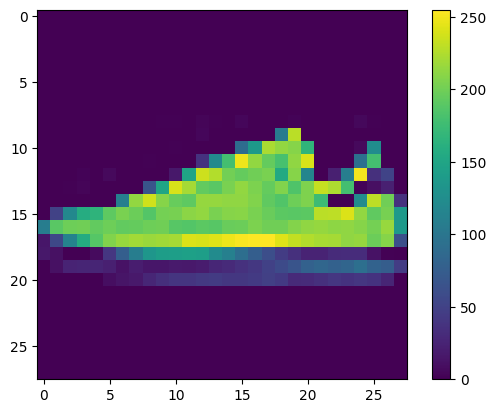

In [16]:
plt.figure()
plt.imshow(shoe_data[1])
plt.colorbar()
plt.grid(False)


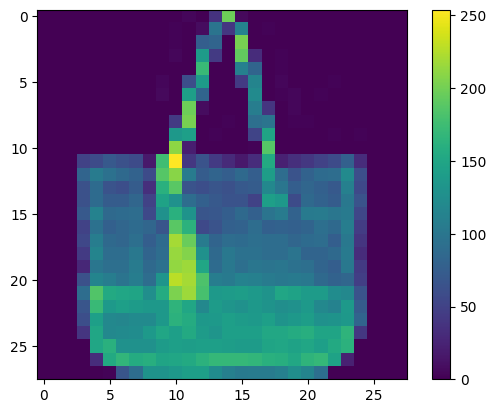

In [17]:
plt.figure()
plt.imshow(accessory_data[1])
plt.colorbar()
plt.grid(False)

In [18]:
# Перемішаємо тренувальні дані
train_data_comb = tf.data.Dataset.from_tensor_slices((x_train_comb, y_train_comb))
train_data_comb = train_data_comb.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [19]:
x_train_comb_1, x_test_comb_1 = x_train_comb / 255., x_test / 255.
y_train_comb_1, y_test_comb_1 = y_train_comb, y_test_comb

# ДЗ-9

In [20]:
# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

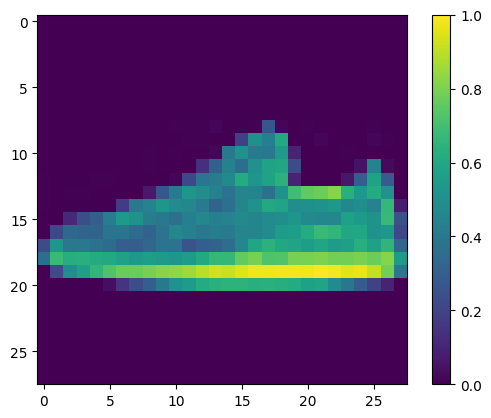

In [ ]:
plt.figure()
plt.imshow(x_train_comb_1[0])
plt.colorbar()
plt.grid(False)

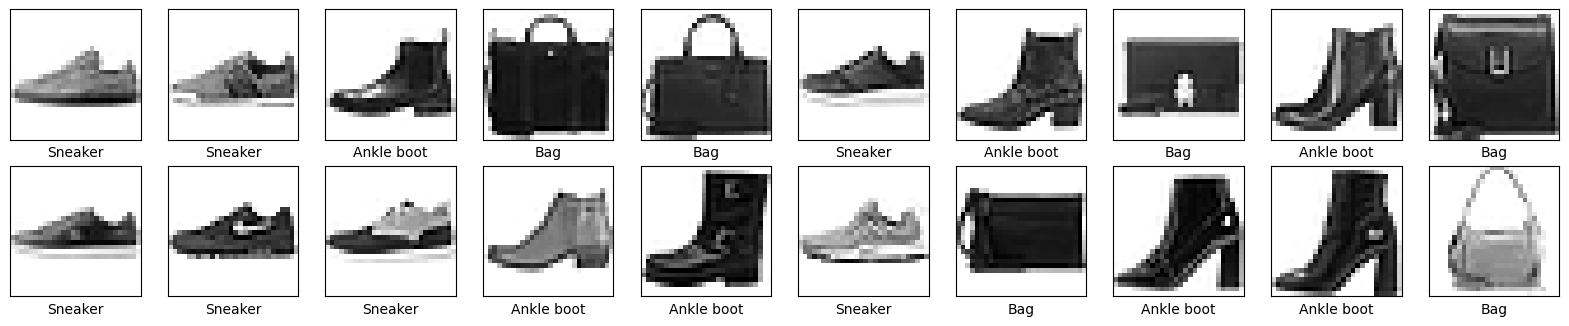

In [21]:
plt.figure(figsize=(20,20))
for i in range(20):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_comb_1[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_comb_1[i]])

In [36]:
model_comb = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    # Dropout(0.3),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    # Dropout(0.3),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [23]:
# model_comb.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
from tensorflow.keras.optimizers import Adam

# Задати швидкість навчання
learning_rate = 0.0001

# Створити оптимізатор Adam з вказаною швидкістю навчання
optimizer = Adam(learning_rate=learning_rate)

# Компіляція моделі з використанням оптимізатора
model_comb.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [38]:
model_comb.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 Hypothesis (Dense)          (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# history=model.fit(x_train_1, y_train_1, batch_size=32, epochs=20, validation_split=0.2)
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), verbose=0)
history = model_comb.fit(x_train_comb_1, y_train_comb_1, batch_size=512, epochs=10, validation_split=0.2, verbose=0)

# Отримання історії навчання
loss_comb = history.history['loss']
val_loss_comb = history.history['val_loss']
accuracy_comb = history.history['accuracy']
val_accuracy_comb = history.history['val_accuracy']
epochs_comb = range(1, len(loss_comb) + 1)

final_loss_comb = history.history['loss'][-1]
final_val_loss_comb = history.history['val_loss'][-1]
final_accuracy_comb = history.history['accuracy'][-1]
final_val_accuracy_comb = history.history['val_accuracy'][-1]

print("Final Loss:", final_loss_comb)
print("Final Validation Loss:", final_val_loss_comb)
print("Final Accuracy:", final_accuracy_comb)
print("Final Validation Accuracy:", final_val_accuracy_comb)


Final Loss: 0.1287636011838913
Final Validation Loss: 0.14681154489517212
Final Accuracy: 0.953906238079071
Final Validation Accuracy: 0.949305534362793


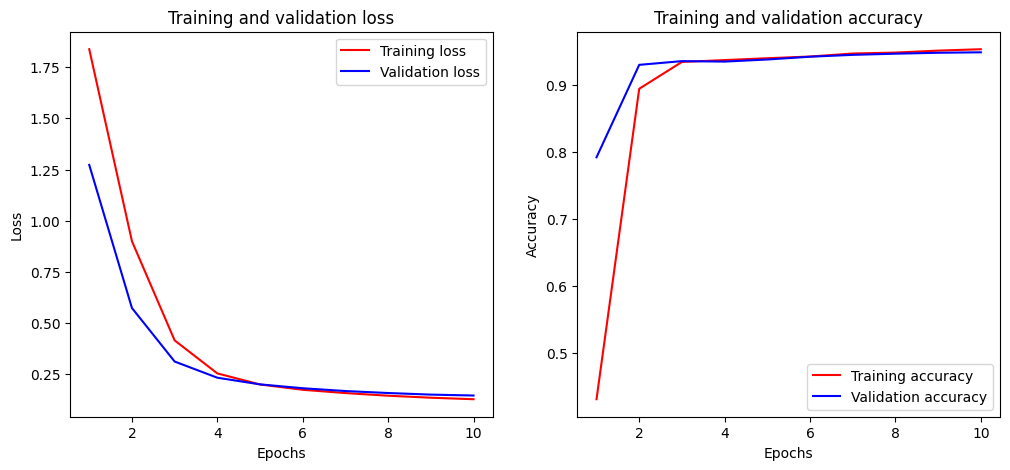

In [40]:
# Побудова графіків
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(epochs_comb, loss_comb, 'r', label='Training loss')
plt.plot(epochs_comb, val_loss_comb, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(epochs_comb, accuracy_comb, 'r', label='Training accuracy')
plt.plot(epochs_comb, val_accuracy_comb, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [41]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [42]:
# Нормалізуємо значення пікселів
x_train_1, x_test_1 = x_train / 255., x_test / 255.
y_train_1, y_test_1 = y_train, y_test

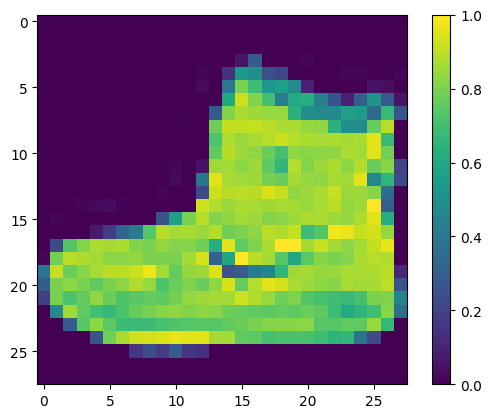

In [43]:
plt.figure()
plt.imshow(x_train_1[0])
plt.colorbar()
plt.grid(False)

Подивимось датасет частково

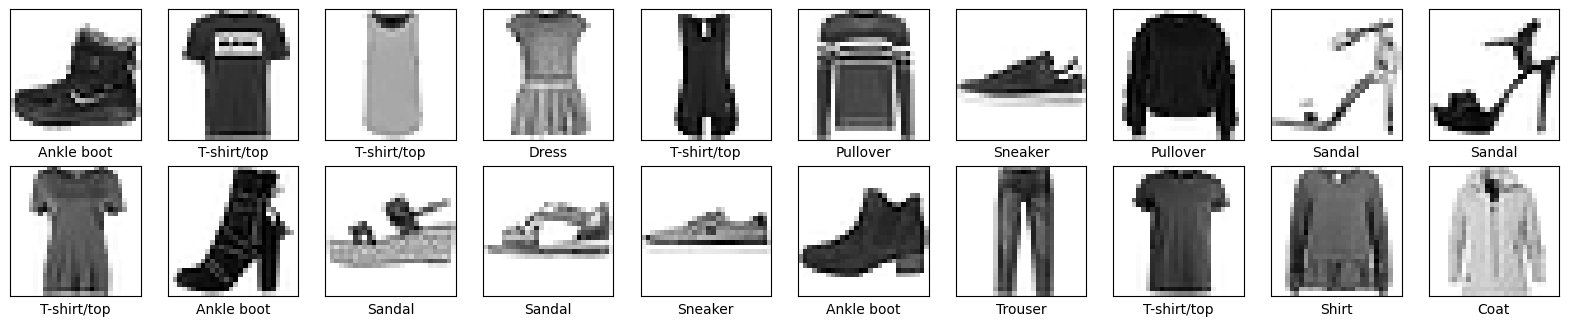

In [44]:
plt.figure(figsize=(20,20))
for i in range(20):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_1[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train_1[i]])


In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(n_hidden_1, activation='relu', name='1st_layer'),
    Dropout(0.3),
    keras.layers.Dense(n_hidden_2, activation='relu', name='2nd_layer'),
    Dropout(0.3),
    keras.layers.Dense(num_classes, activation = 'softmax', name = 'Hypothesis')
])

In [ ]:
#Копиляція моделі

In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 1st_layer (Dense)           (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 2nd_layer (Dense)           (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 Hypothesis (Dense)          (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136

Final Loss: 0.29081642627716064
Final Validation Loss: 0.32563430070877075
Final Accuracy: 0.8912083506584167
Final Validation Accuracy: 0.8836666941642761


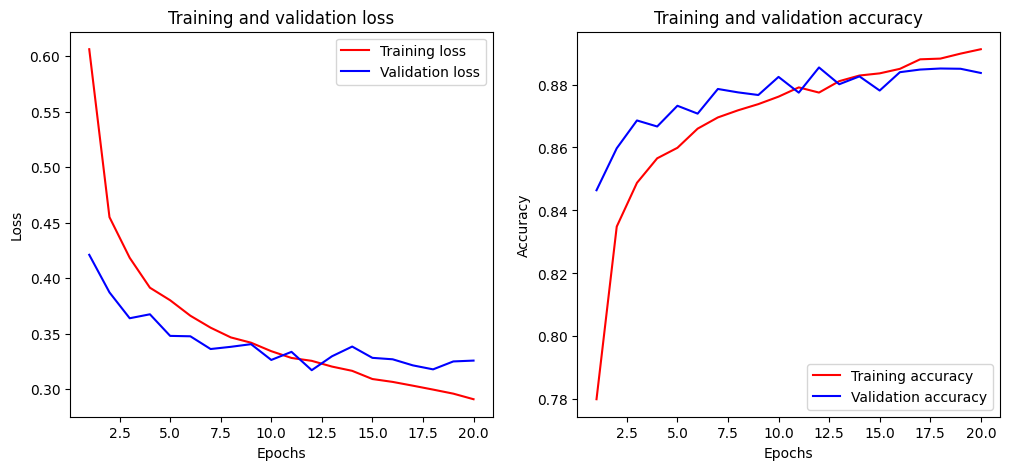

In [48]:
# history=model.fit(x_train_1, y_train_1, batch_size=32, epochs=20, validation_split=0.2)
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), verbose=0)
history = model.fit(x_train_1, y_train_1, batch_size=32, epochs=20, validation_split=0.2, verbose=0)

# Отримання історії навчання
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Loss:", final_loss)
print("Final Validation Loss:", final_val_loss)
print("Final Accuracy:", final_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

# Побудова графіків
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
test_loss_1, test_acc_1 = model.evaluate(x_test_1, y_test_1)
print('Test accuracy:', test_acc_1)
print('Test loss:', test_loss_1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3540 - accuracy: 0.8726
Test accuracy: 0.8726000189781189
Test loss: 0.3540456295013428


1/1 [==============================] - 0s 103ms/step
[[1.66118800e-04 5.97007315e-08 9.32668924e-01 1.53497103e-06
  2.01208312e-02 1.38314915e-11 4.70420644e-02 3.84799588e-11
  4.82329369e-07 3.67772868e-10]]
Предмет що розпізнаний: Pullover


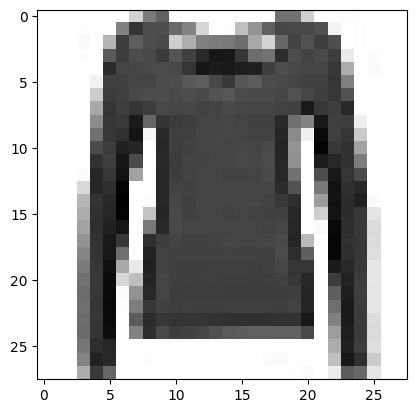

In [ ]:
n=233
x=np.expand_dims(x_test_1[n], axis=0)
res = model.predict(x)
print(res)
print(f'Предмет що розпізнаний: {class_names[np.argmax(res)]}')
plt.imshow(x_test_1[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
predictions = model.predict(x_train_1)

1875/1875 [==============================] - 4s 2ms/step


In [ ]:
predictions[233]

array([1.9893520e-07, 8.1720362e-17, 3.5703662e-12, 2.2015937e-13,
       3.7774042e-10, 6.7435297e-09, 2.2385045e-09, 2.3703584e-10,
       9.9999970e-01, 4.8340127e-09], dtype=float32)

In [ ]:
class_names[np.argmax(predictions[233])]

'Bag'

In [ ]:
class_names[y_train_1[233]]

'Bag'

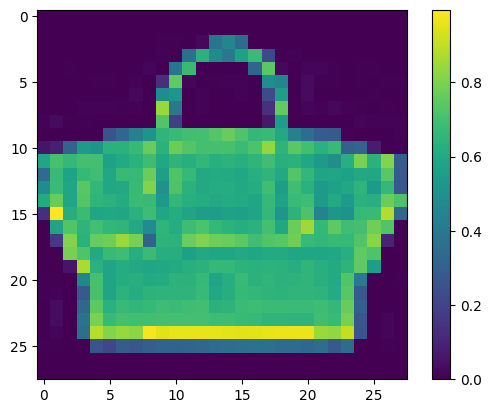

In [ ]:
plt.figure()
plt.imshow(x_train_1[233])
plt.colorbar()
plt.grid(False)

In [ ]:
class_names[np.argmax(predictions[233])]

'Bag'

In [ ]:
predictions_all = model.predict(x_test_1)
predictions_all = np.argmax(predictions_all, axis=1)

predicted_class_names = [class_names[label] for label in predictions_all]
true_class_names = [class_names[label] for label in y_test_1]


313/313 [==============================] - 2s 5ms/step


In [ ]:
from tabulate import tabulate

# Prepare data for the table
table_data = []
for i in range(30):
    predicted_class = predicted_class_names[i]
    true_class = true_class_names[i]
    if predicted_class != true_class:
        table_data.append([f"\033[91m{predicted_class}\033[0m", true_class])
    else:
        table_data.append([predicted_class, true_class])

# Print the table
print(tabulate(table_data, headers=["Predicted Class", "True Class"], tablefmt="fancy_grid"))


╒═══════════════════╤══════════════╕
│ Predicted Class   │ True Class   │
╞═══════════════════╪══════════════╡
│ Ankle boot        │ Ankle boot   │
├───────────────────┼──────────────┤
│ Pullover          │ Pullover     │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Shirt             │ Shirt        │
├───────────────────┼──────────────┤
│ Trouser           │ Trouser      │
├───────────────────┼──────────────┤
│ Coat              │ Coat         │
├───────────────────┼──────────────┤
│ Shirt             │ Shirt        │
├───────────────────┼──────────────┤
│ Sandal            │ Sandal       │
├───────────────────┼──────────────┤
│ Sneaker           │ Sneaker      │
├───────────────────┼──────────────┤
│ Coat              │ Coat         │
├───────────────────┼──────────────┤
│ Sandal            │ Sandal       │
├───────────────────┼──────────────┤
│

In [ ]:
mask=predictions_all==y_test_1
print(mask[:30])
x_false=x_test_1[~mask]
y_false=predictions_all[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True False  True  True  True  True  True False
  True False  True  True  True  True]
(1274, 28, 28)


In [ ]:
print(f'Кількість помилкових значень: {len(x_false)}')


Кількість помилкових значень: 1274


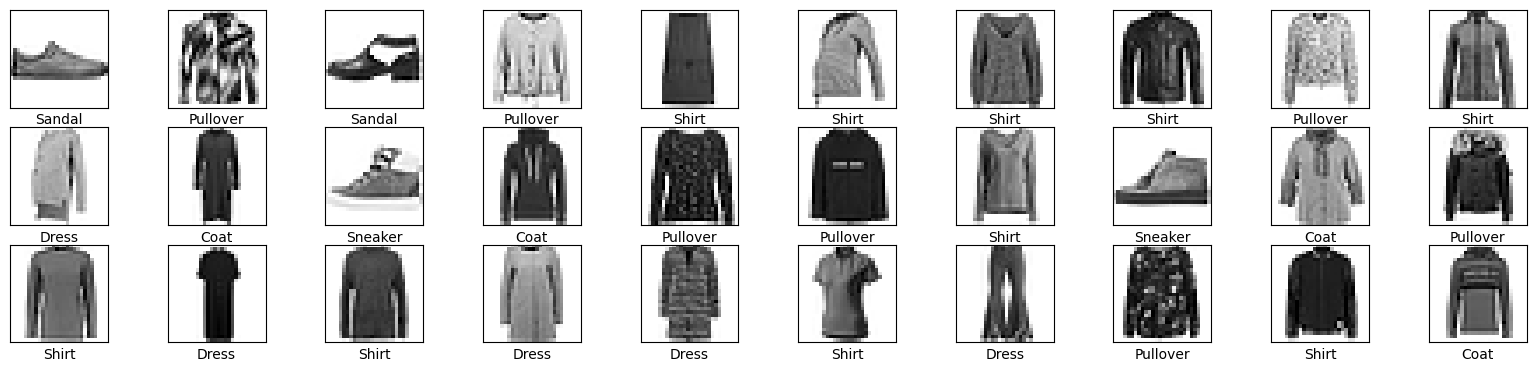

In [ ]:
plt.figure(figsize=(20,15))
for i in range(30):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_false[i]])

In [ ]:
import numpy as np

# Порівняння прогнозованих міток з правильними мітками
mask = predictions_all != y_test_1

# Отримання помилкових прогнозів та їх правильних міток
x_false = x_test_1[mask]
y_false = y_test_1[mask]

# Підрахунок кількості помилкових класифікацій для кожної цифри
false_counts = np.bincount(y_false)

for digit, count in enumerate(false_counts):
    print(f"{class_names[digit]}: {count} помилкових класифікацій")

T-shirt/top: 172 помилкових класифікацій
Trouser: 33 помилкових класифікацій
Pullover: 269 помилкових класифікацій
Dress: 75 помилкових класифікацій
Coat: 275 помилкових класифікацій
Sandal: 38 помилкових класифікацій
Shirt: 298 помилкових класифікацій
Sneaker: 25 помилкових класифікацій
Bag: 31 помилкових класифікацій
Ankle boot: 58 помилкових класифікацій


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[828   2   9  35   2   1 117   0   6   0]
 [  2 967   1  23   3   0   3   0   1   0]
 [ 19   2 731  17 129   0 100   0   2   0]
 [ 16   7   5 925  16   0  27   0   4   0]
 [  0   0  69  53 725   0 149   0   4   0]
 [  0   0   0   0   0 962   0  26   2  10]
 [117   2 103  36  34   0 702   0   6   0]
 [  0   0   0   0   0  10   0 975   0  15]
 [  3   0   6   2   6   2   8   4 969   0]
 [  0   0   0   0   0   8   1  49   0 942]]


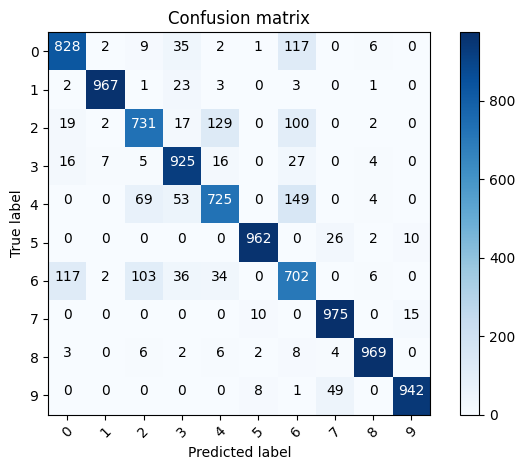

In [ ]:
y_pred = np.argmax(model.predict(x_test_1), axis=1)
cm = confusion_matrix(y_test_1, y_pred)
plot_confusion_matrix(cm, classes=range(10))

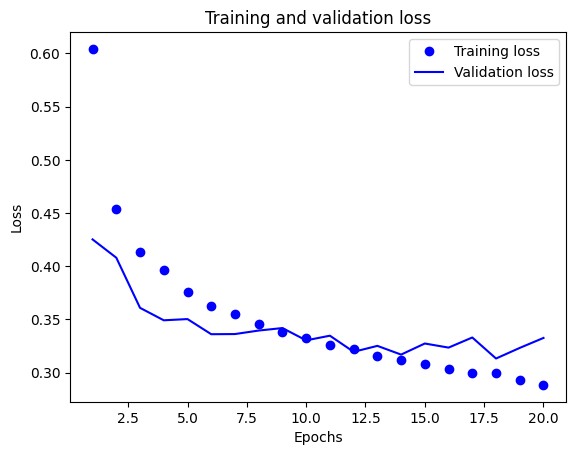

In [ ]:
import matplotlib.pyplot as plt

# Отримання даних з історії навчання моделі
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Побудова графіка помилки від розміру тренувальних даних
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


NameError: name 'irreducible_error' is not defined

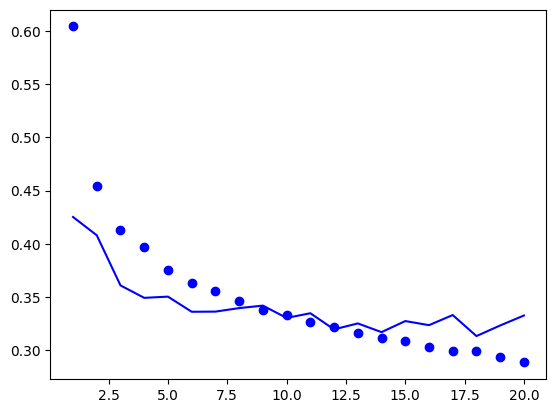

In [ ]:
import matplotlib.pyplot as plt

# Отримання даних з історії навчання моделі
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Побудова графіка помилки від розміру тренувальних даних з врахуванням irreducible error
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.axhline(y=irreducible_error, color='r', linestyle='--', label='Irreducible error')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

